# k-Nearest Neighbor Study
# Introduction

##### Purpose  
The purpose of this study is to evaluate two approaches to evaluate two methods to determine the nearest neighbors of unknowns using knn classification for two factors with two classes and the optimal number of neighbors to achieve the most accuate classification. Presumably, these methods can be expanded to more dimensions and classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### Data set  
The data set can be found at UCI machine learning repository, cf. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The data set contains two diagnostic classes for breast cancer, malignant 'M' and benign 'B' and numeric descriptors of cell characteristics from each biopsy.

In [2]:
#read data set from the csv file.
df = pd.read_csv('data/wdbc.csv')
df.head()

,id_number,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### Select two variables for kNN evaluation  
Factors were checked haphazardly until two with relatively broad separation were found.  The factors used will be mean cell radius and mean number of concave points (on cells). The histograms below show the distribution of the factors by classification. Note: the distributions are unlikely to be normal.

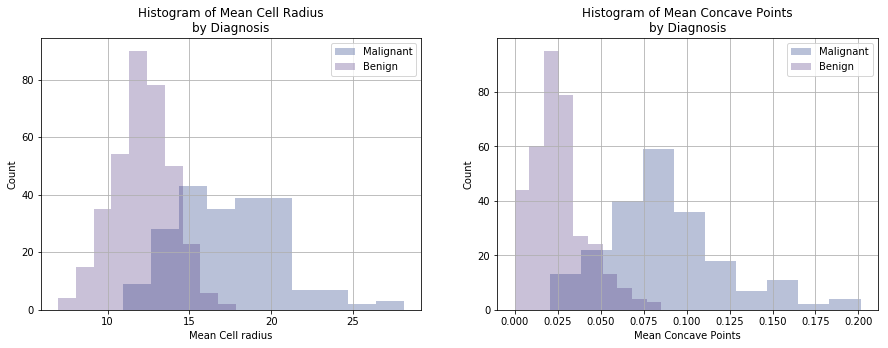

In [3]:
#set up figure
plt.figure(figsize=(15,5))
#set up histograms of data, by diagnosis.
plt.subplot(121)
plt.hist(df[df['diagnosis']=='M'].mean_radius,color=(0.1, 0.2, 0.5, 0.3),
        label='Malignant')
plt.hist(df[df['diagnosis']=='B'].mean_radius,color=(0.3, 0.2, 0.5, 0.3),
        label='Benign')
plt.title('Histogram of Mean Cell Radius\nby Diagnosis')
plt.xlabel('Mean Cell radius')
plt.ylabel('Count')
plt.legend()
plt.grid()

#histogram of mean concave points
plt.subplot(122)
plt.hist(df[df['diagnosis']=='M'].mean_concave_points,
         color=(0.1, 0.2, 0.5, 0.3),label='Malignant')
plt.hist(df[df['diagnosis']=='B'].mean_concave_points,
         color=(0.3, 0.2, 0.5, 0.3),label='Benign')
plt.title('Histogram of Mean Concave Points\nby Diagnosis')
plt.xlabel('Mean Concave Points')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


The chart below shows the joint distribution of mean cell radius (x-axis) and mean concave points (y-axis). K nearest neighbors will categorize and unknown diagnosis by finding the categories of the k number of nearest known diagnoses. 

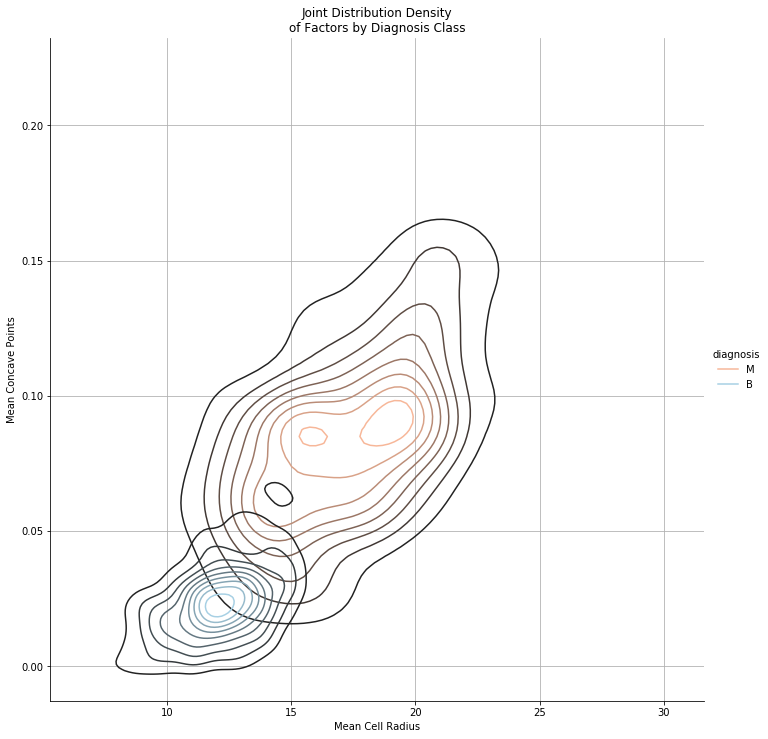

In [4]:
np.warnings.filterwarnings('ignore') #ignore warnings
#seabon facetgrid and kernel density estimation(kde) plot
g = sns.FacetGrid(df, hue='diagnosis', palette='RdBu', height=10)
g.map(sns.kdeplot, 'mean_radius', 'mean_concave_points')
g.add_legend()
plt.title('Joint Distribution Density\nof Factors by Diagnosis Class')
plt.xlabel('Mean Cell Radius')
plt.ylabel('Mean Concave Points')
plt.grid()
plt.show()

##### Two approaches  to kNN  
In the kNN algorithm the distance between an unknown classified point and known classified points are calculated. The classification is assigned by the finding the greatness number of closest classes to the unknown point. Two approaches are used to determine the closest points for all k numbers of known points. The first is to count the number each class for k points and assign the class with the greatest number. The second is to take the average magnitude of each class and assign the least magnitude.  
Two notebooks follow this introduction. First is the data setup, where the raw data is manipulated before analysis. The second is kNN analysis, where the two approaches are analyzed, the optimal k is obtained, and compared to sklean kNN analysis.